참고자료

https://ichi.pro/ko/tensorflow-gaegche-gamji-gaideu-tensorflow-2-252181752953859

https://medium.com/swlh/tensorflow-2-object-detection-api-with-google-colab-b2af171e81cc

# 1. 종속성 설치 및 작업 공간 설정.
작업 공간을위한 폴더 만들기

In [1]:
%mkdir workspace

In [2]:
%cd /content/workspace

/content/workspace


In [3]:
!git clone --q https://github.com/tensorflow/models.git

“Tensorflow Object Detection API는 Protobufs를 사용하여 모델 및 학습 매개 변수를 구성합니다. 프레임 워크를 사용하기 전에 Protobuf 라이브러리를 다운로드하고 컴파일해야합니다.”

In [4]:
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk

Selecting previously unselected package python-bs4.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpacking pyt

In [5]:
!pip install -qq Cython contextlib2 pillow lxml matplotlib

In [6]:
!pip install -qq pycocotools

In [7]:
%cd models/research/

/content/workspace/models/research


In [8]:
!protoc object_detection/protos/*.proto --python_out=.

In [9]:
%cp object_detection/packages/tf2/setup.py .

In [10]:
!python -m pip install .

Processing /content/workspace/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.8 MB 7.9 MB/s 
     |████████████████████████████████| 352 kB 57.9 MB/s 
     |████████████████████████████████| 1.8 MB 64.8 MB/s 
     |████████████████████████████████| 22.7 MB 65.7 MB/s 
     |████████████████████████████████| 4.4 MB 22.9 MB/s 
     |████████████████████████████████| 1.2 MB 73.6 MB/s 
     |████████████████████████████████| 596 kB 79.8 MB/s 
     |████████████████████████████████| 213 kB 82.6 MB/s 
     |████████████████████████████████| 90 kB 12.4 MB/s 
     |███████████████████████████████

In [11]:
!python object_detection/builders/model_builder_tf2_test.py

2021-11-08 18:47:40.528892: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-08 18:47:40.761082: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-08 18:47:40.761729: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-11-08 18:47:40.775892: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021

# 필요한 파일들 업로드 하기

필요한 파일을 저장할 폴더를 만들어서 업로드

- pretrained model
- tfrecord
- label map
- pipeline config

In [12]:
%cd /content/workspace

/content/workspace


In [13]:
%mkdir annotations exported-models pre-trained-models models/my_mobilenet # my_mobilenet folder is where our training results will be stored

In [14]:
!cp -r /content/drive/Shareddrives/OD/pretrained_model/* /content/workspace/pre-trained-models

In [15]:
!cp /content/drive/Shareddrives/OD/train.tfrecord /content/workspace/annotations

In [16]:
!cp /content/drive/Shareddrives/OD/val.tfrecord /content/workspace/annotations

In [17]:
!cp /content/drive/Shareddrives/OD/data_real/label_map.pbtxt /content/workspace/annotations

In [18]:
!cp /content/drive/Shareddrives/OD/modified_pipeline.config /content/workspace/pre-trained-models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8

# 훈련 작업 실행
쉽게 액세스 할 수 있도록 TensorFlow 교육용 Python 스크립트를 작업 공간 디렉토리에 복사합니다.

In [19]:
# 환경변수 설정??
import os
os.environ['PYTHONPATH'] += ':/content/object_detection/models/:/content/object_detection/models/research/:/content/object_detection/models/research/slim/'

In [20]:
!cp /content/workspace/models/research/object_detection/model_main_tf2.py .

In [21]:
!cp /content/workspace/models/research/object_detection/exporter_main_v2.py .

- model_dir : 학습 프로세스가 체크 포인트 파일을 저장할 경로를 나타냅니다.
- pipeline_config_path : pipeline.config 파일이 저장된 경로를 나타냅니다.

출력은 일반적으로 느리게 업데이트됩니다. 학습 출력은 기본적으로 100 단계마다 기록하므로 잠시 기다리면 100 단계에서 손실에 대한 로그가 표시됩니다. 속도는 GPU가 학습에 사용되고 있는지 여부와 사용 가능한 VRAM 및 기타 여러 가지에 따라 다릅니다. 요인이므로 인내심을 가지십시오.

손실이 상당히 일정한 값에 도달하거나 0.05 (제 경우)보다 낮아지면 학습 셀을 중지 할 수 있습니다.

In [22]:
!python model_main_tf2.py --model_dir=models/my_mobilenet --pipeline_config_path=/content/workspace/pre-trained-models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/modified_pipeline.config

2021-11-08 18:54:10.009931: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-08 18:54:10.228314: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-08 18:54:10.228982: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-08 18:54:10.238411: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-08 18:54:10.239055: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

# 모델 내보내기
이제 모델이 준비되었으므로 나중에 사용할 수있는 형식으로 저장해야합니다.

이제 `models / my_mobilenet` 폴더 에 여러 체크 포인트가 있습니다. 모든 이전 체크 포인트를 제거하고 최신 체크 포인트를 유지하기 위해 작업을 자동으로 수행하는 깔끔한 작은 파이썬 스크립트를 첨부했습니다.

In [23]:
import numpy as np
import re

output_directory = 'exported-models/'

# goes through the model is the training/ dir and gets the last one.
# you could choose a specfic one instead of the last
lst = os.listdir("models/my_mobilenet/")
print(lst)
lst = [l for l in lst if 'ckpt-' in l and '.index' not in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()]
last_model_path = os.path.join('models/my_mobilenet', last_model)
print(last_model_path)

['ckpt-26.index', 'ckpt-31.index', 'ckpt-25.data-00000-of-00001', 'ckpt-31.data-00000-of-00001', 'ckpt-30.index', 'ckpt-26.data-00000-of-00001', 'checkpoint', 'ckpt-29.data-00000-of-00001', 'train', 'ckpt-25.index', 'ckpt-27.data-00000-of-00001', 'ckpt-28.index', 'ckpt-27.index', 'ckpt-30.data-00000-of-00001', 'ckpt-29.index', 'ckpt-28.data-00000-of-00001']
models/my_mobilenet/ckpt-31.data-00000-of-00001


이제 모델을 내보내기 위해 다음과 같이 TF2에서 제공하는 내보내기 스크립트를 실행합니다.

In [24]:
!python /content/workspace/models/research/object_detection/exporter_main_v2.py --input_type=image_tensor \
--pipeline_config_path=/content/workspace/pre-trained-models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/modified_pipeline.config \
--output_directory=exported-models \
--trained_checkpoint_dir=models/my_mobilenet

2021-11-08 20:15:40.748828: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-08 20:15:40.894645: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-08 20:15:40.895299: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-08 20:15:40.907201: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-08 20:15:40.907803: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

# Step 17- Testing the model (Loading saved_model)

In [25]:
#Loading the saved_model(change the path according to your directory names)

import tensorflow as tf
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL="/content/workspace/exported-models/saved_model"

print('Loading model...', end='')

# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)

print('Done!')

Loading model...Done!


# Step 18- Testing the model (Loading label_map)

In [26]:
#Loading the label_map
category_index=label_map_util.create_category_index_from_labelmap("/content/workspace/annotations/label_map.pbtxt",use_display_name=True)

#category_index=label_map_util.create_category_index_from_labelmap([path_to_label_map],use_display_name=True)

# Step 19- Testing the model (Loading images)

In [27]:
#Loading the image
#img=['/content/drive/Shareddrives/OD/data_real/test/images/OBJ03445_PS3_K3A_NIA0139.png']
#print(img)

#list containing paths of all the images

['/content/drive/Shareddrives/OD/data_real/test/images/OBJ03445_PS3_K3A_NIA0139.png']


# Step 20- Running the Inference

bbox가 안 그려짐 ㅠㅠ

In [28]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

image_path='/content/drive/Shareddrives/OD/data_real/test/images/OBJ03445_PS3_K3A_NIA0139.png'

image_np=np.array(Image.open(image_path))
input_tensor=tf.convert_to_tensor(image_np)
input_tensor=input_tensor[tf.newaxis, ...]
detections=detect_fn(input_tensor)

detections['detection_boxes']

<tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
array([[[0.        , 0.        , 0.90105367, 0.5017719 ],
        [0.        , 0.        , 0.3929668 , 0.67219573],
        [0.        , 0.        , 0.6500928 , 0.38298136],
        [0.        , 0.        , 1.        , 1.        ],
        [0.        , 0.        , 1.        , 0.8083494 ],
        [0.        , 0.        , 0.49439573, 0.50182825],
        [0.        , 0.        , 0.90105367, 0.5017719 ],
        [0.        , 0.        , 0.90105367, 0.5017719 ],
        [0.        , 0.        , 0.5121118 , 0.887402  ],
        [0.        , 0.        , 0.5121118 , 0.887402  ],
        [0.        , 0.        , 0.5121118 , 0.887402  ],
        [0.        , 0.        , 0.3929668 , 0.67219573],
        [0.        , 0.        , 0.5121118 , 0.887402  ],
        [0.        , 0.        , 0.90105367, 0.5017719 ],
        [0.        , 0.        , 0.6684577 , 0.65678626],
        [0.        , 0.        , 0.6500928 , 0.38298136],
        [0.        

In [29]:
num_detections=int(detections.pop('num_detections'))
num_detections

100

In [30]:
detections={key:value[0,:num_detections].numpy()
                   for key,value in detections.items()}
detections

{'detection_anchor_indices': array([12605., 12602., 12604., 12787., 12755., 12600., 12605., 12605.,
        12603., 12603., 12603., 12602., 12603., 12605., 12601., 12604.,
        12605., 12601., 12787., 12601., 12605., 12602., 12600., 12791.,
        12600., 12604., 12601., 12786., 12603., 12605., 12602., 12601.,
        12629., 12601., 12605., 12605., 12600., 12601., 12789., 12799.,
        12605., 12605., 12762., 12604., 12604., 12600., 12629., 12600.,
        12753., 12803., 12765., 12600., 12799., 12799., 12753., 12601.,
        12601., 12753., 12602., 12788., 12600., 12603., 12625., 12602.,
        12751., 12604., 12604., 12601., 12791., 12601., 12767., 12603.,
        12802., 12788., 12600., 12765., 12786., 12605., 12786., 12625.,
        12764., 12601., 12801., 12601., 12767., 12786., 12626., 12625.,
        12790., 12790., 12604., 12800., 12752., 12763., 12791., 12790.,
        12605., 12628., 12752., 12791.], dtype=float32),
 'detection_boxes': array([[0.        , 0.        ,

In [31]:
detections['num_detections']=num_detections
detections['num_detections']

100

In [32]:
detections['detection_classes']=detections['detection_classes'].astype(np.int64)
image_np_with_detections=image_np.copy()

Done


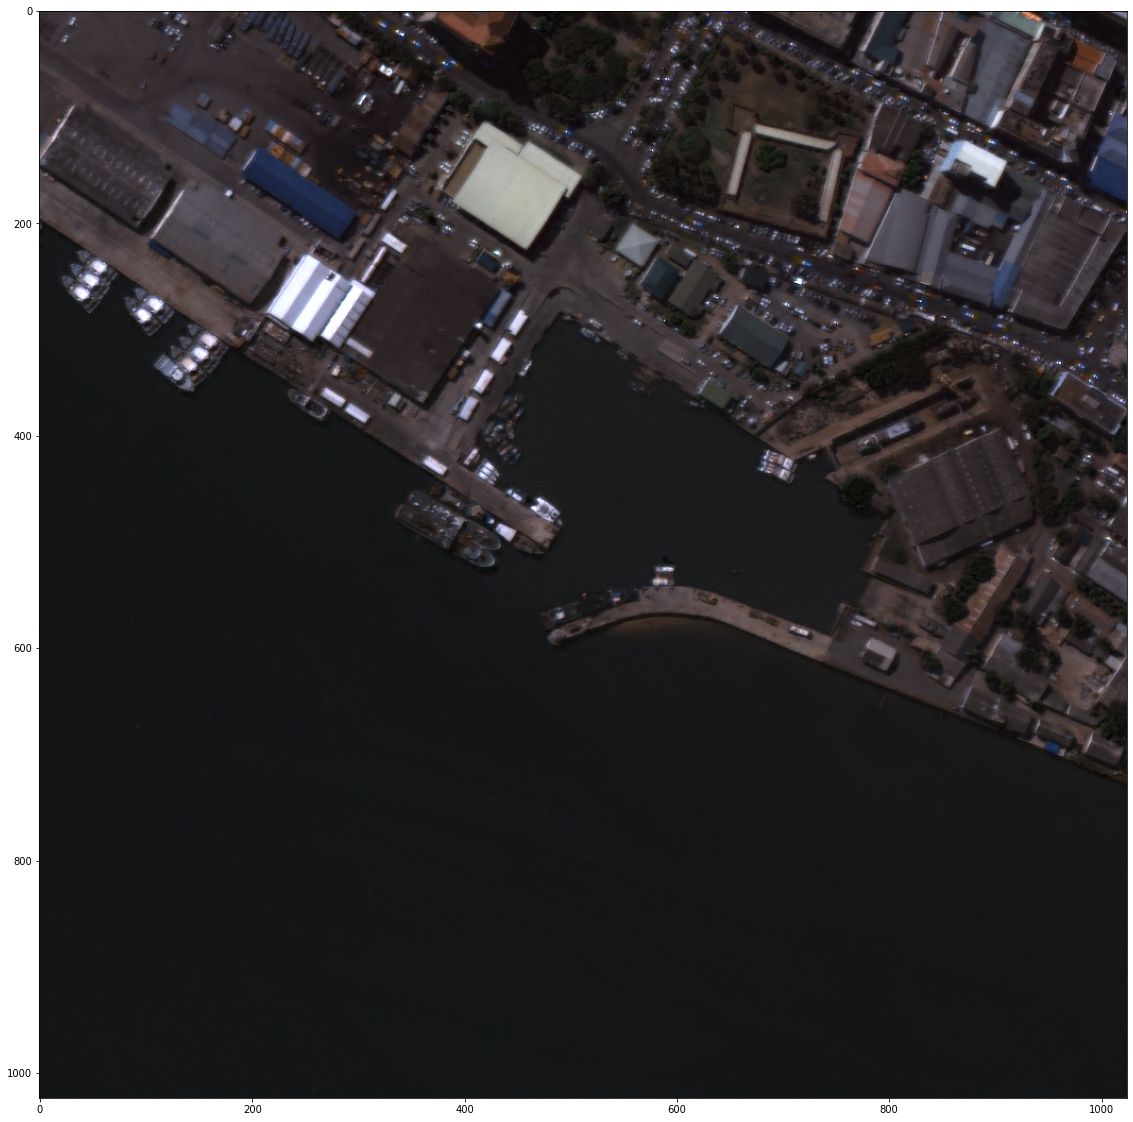

In [33]:
viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'], 
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=100,     
          min_score_thresh=.5,      
          agnostic_mode=False)

%matplotlib inline
plt.figure(figsize=(20,20))
plt.imshow(image_np_with_detections)
print('Done')
plt.show()